___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [63]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [64]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [65]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [66]:
x_train.shape

(60000, 28, 28)

In [67]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

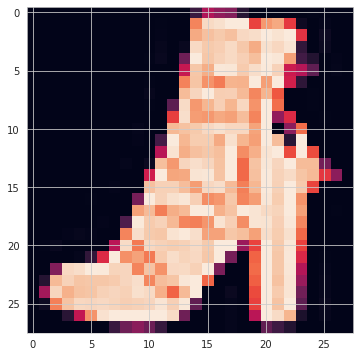

In [68]:
plt.imshow(x_train[11]);

In [69]:
y_train.shape

(60000,)

In [70]:
y_train[11]

9

In [71]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [72]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [73]:
y_train[11]

9

In [74]:
classes[y_train[0]]

'Ankle boot'

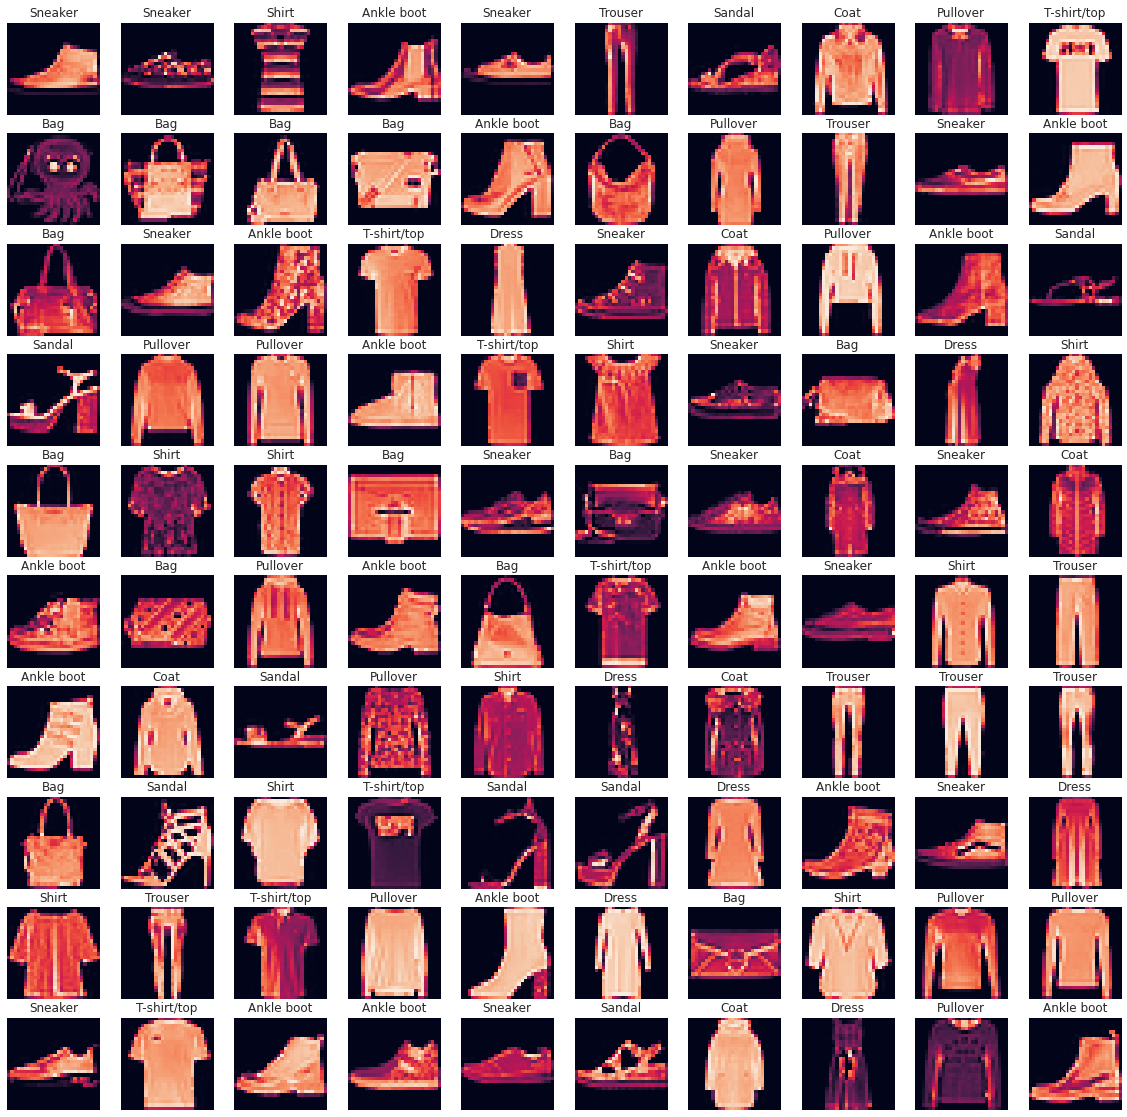

In [75]:
plt.figure(figsize=(20, 20))
for i in range(100):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [76]:
x_train[11].min()

0

In [77]:
x_train[11].max()

255

In [78]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [79]:
x_train[11].min()

0.0

In [80]:
x_train[11].max()

1.0

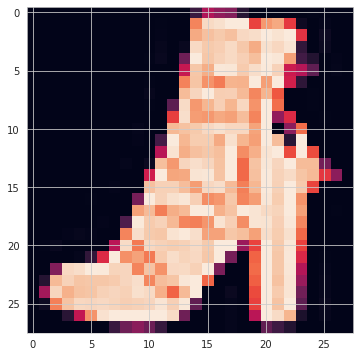

In [81]:
plt.imshow(x_train[11]);

In [82]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [83]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [84]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [85]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [86]:
from tensorflow.keras.utils import to_categorical

In [87]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [88]:
Y_train[11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [89]:
X_train = x_train
X_test = x_test

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [91]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 42)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2058)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [95]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5157 - accuracy: 0.8140 - val_loss: 0.3709 - val_accuracy: 0.8689
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3238 - accuracy: 0.8842 - val_loss: 0.3092 - val_accuracy: 0.8878
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2767 - accuracy: 0.9003 - val_loss: 0.3197 - val_accuracy: 0.8855
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2465 - accuracy: 0.9104 - val_loss: 0.2705 - val_accuracy: 0.9017
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2220 - accuracy: 0.9185 - val_loss: 0.2494 - val_accuracy: 0.9091
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2011 - accuracy: 0.9259 - val_loss: 0.2627 - val_accuracy: 0.9066
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1835 - accuracy: 0.9322 - val_loss: 0.2352 - val_accuracy: 0.9152

**TASK 7: Plot values of metrics you used in your model.**

In [96]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,loss,accuracy,val_loss,val_accuracy
17,0.054,0.980,0.321,0.919
18,0.047,0.982,0.325,0.919
19,0.044,0.984,0.373,0.916
20,0.039,0.986,0.392,0.917
21,0.034,0.987,0.397,0.916


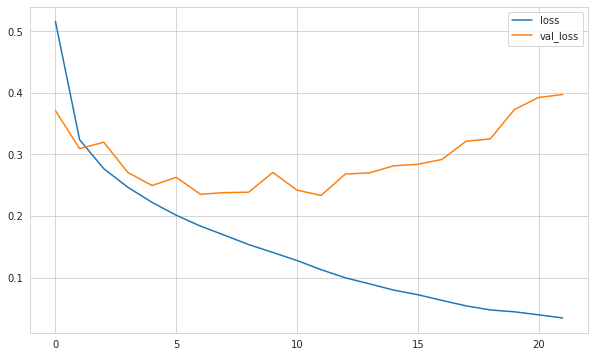

In [97]:
summary[["loss", "val_loss"]].plot();

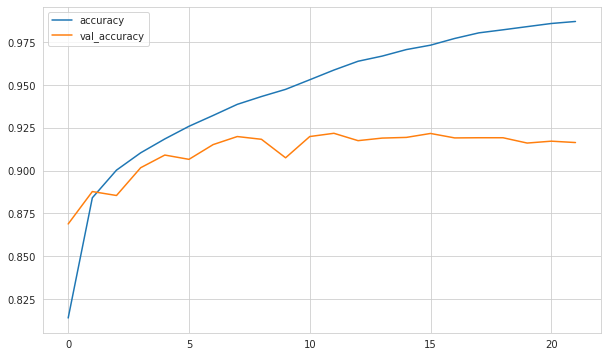

In [98]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2333 - accuracy: 0.9218


[0.2332824468612671, 0.9218000173568726]

In [101]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2332824468612671
Test accuracy: 0.9218000173568726


## Prediction

In [102]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[2.49893048e-07, 2.25079441e-10, 1.70492001e-06, ...,
        6.45900378e-04, 6.25277096e-07, 9.99315023e-01],
       [4.55823783e-06, 6.69019441e-12, 9.99995232e-01, ...,
        6.26108540e-11, 1.66117431e-09, 7.53514818e-14],
       [5.81258652e-10, 1.00000000e+00, 7.92419075e-10, ...,
        8.67681443e-18, 1.14818266e-10, 1.55353258e-10],
       ...,
       [3.20553795e-07, 4.16326218e-09, 7.92131090e-08, ...,
        6.31879038e-09, 9.99994040e-01, 1.41439652e-10],
       [1.25059407e-09, 1.00000000e+00, 3.85162302e-09, ...,
        1.59343379e-18, 3.18263103e-13, 6.23452635e-12],
       [8.61594235e-05, 2.46699092e-05, 6.83934195e-05, ...,
        6.53482135e-03, 3.23325454e-04, 1.69006671e-05]], dtype=float32)

In [103]:
y_pred = np.argmax(pred_prob, axis=1)

In [104]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [105]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [106]:
print(confusion_matrix(y_test, y_pred))

[[845   0  19  13   3   1 115   0   4   0]
 [  1 991   0   7   0   0   1   0   0   0]
 [ 14   1 894   8  32   0  50   0   1   0]
 [ 13   4   7 938  15   0  21   0   2   0]
 [  1   0  60  23 865   0  51   0   0   0]
 [  0   0   0   0   0 988   0  11   0   1]
 [ 71   2  58  26  52   0 785   0   6   0]
 [  0   0   0   0   0  12   0 970   0  18]
 [  4   1   0   4   0   2   2   1 986   0]
 [  1   0   0   0   0  10   1  32   0 956]]


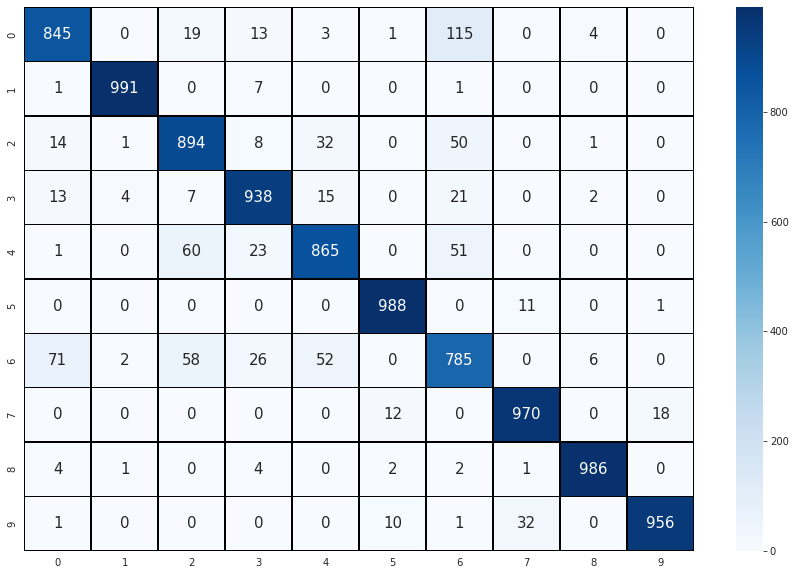

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [108]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.89      0.88      1000
           3       0.92      0.94      0.93      1000
           4       0.89      0.86      0.88      1000
           5       0.98      0.99      0.98      1000
           6       0.77      0.79      0.77      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Model 2

In [110]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [112]:
model.fit(X_train, Y_train, batch_size=128, epochs=12, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/12
469/469 [==============================] - 3s 6ms/step - loss: 0.5842 - accuracy: 0.7871 - val_loss: 0.4079 - val_accuracy: 0.8554
Epoch 2/12
469/469 [==============================] - 3s 5ms/step - loss: 0.3920 - accuracy: 0.8577 - val_loss: 0.3383 - val_accuracy: 0.8824
Epoch 3/12
469/469 [==============================] - 3s 5ms/step - loss: 0.3407 - accuracy: 0.8765 - val_loss: 0.3068 - val_accuracy: 0.8871
Epoch 4/12
469/469 [==============================] - 3s 5ms/step - loss: 0.3139 - accuracy: 0.8837 - val_loss: 0.2890 - val_accuracy: 0.8949
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 0.2937 - accuracy: 0.8912 - val_loss: 0.2870 - val_accuracy: 0.8932
Epoch 6/12
469/469 [==============================] - 3s 5ms/step - loss: 0.2793 - accuracy: 0.8964 - val_loss: 0.2732 - val_accuracy: 0.8995
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 0.2663 - accuracy: 0.9001 - val_loss: 0.2536 - val_accuracy: 0.9086
Epoch 

In [113]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,loss,accuracy,val_loss,val_accuracy
7,0.253,0.904,0.256,0.905
8,0.246,0.909,0.263,0.904
9,0.238,0.911,0.248,0.910
10,0.229,0.914,0.234,0.917
11,0.223,0.916,0.228,0.917


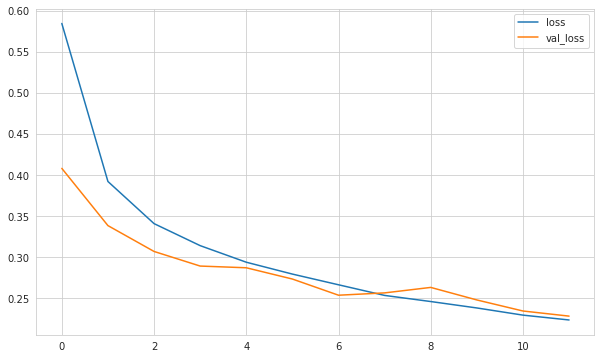

In [114]:
summary[["loss", "val_loss"]].plot();

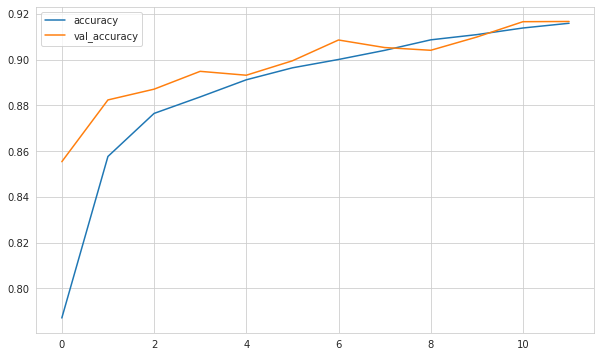

In [115]:
summary[["accuracy", "val_accuracy"]].plot();

In [116]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.9167


[0.22810712456703186, 0.916700005531311]

In [117]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22810712456703186
Test accuracy: 0.916700005531311


In [121]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [122]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [123]:
print(confusion_matrix(y_test, y_pred))

[[861   0  14  17   4   1  98   0   5   0]
 [  2 984   0  11   1   0   1   0   1   0]
 [ 17   1 890   8  36   0  48   0   0   0]
 [ 10   4   7 930  22   0  26   0   1   0]
 [  0   1  46  31 855   0  66   0   1   0]
 [  0   0   0   0   0 977   0  16   0   7]
 [ 95   2  62  22  58   0 752   0   9   0]
 [  0   0   0   0   0   1   0 991   0   8]
 [  3   0   1   3   1   1   2   4 985   0]
 [  0   0   0   0   0   4   1  53   0 942]]


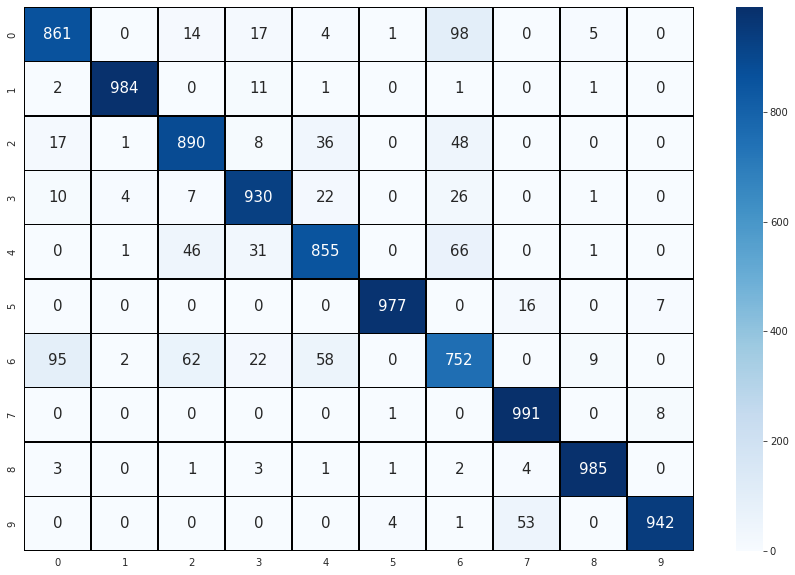

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___